# Spot A Difference? -- Bite-Sized Statistics for Business Decision-Makers

**Imagine this**: you're the CEO of a retail chain with two department stores, A and B. You're reviewing the quarterly report, where a bar chart shows Store A outperforming Store B in customer satisfaction by 5/100 points. Should you replicate Store A's practices and invest in Store B's improvement? 

What if I told you that in one scenario, this action could cost your company millions, while in another scenario, it's exactly the right move?

**The difference between the two scenarios isn't in the numbers you see—it's in the numbers you don't.**

Most business decisions rely on summary comparisons like this: ratings across products, customer satisfaction across stores, employee engagement scores across teams. But summary stats hide critical information that can make or break your next strategic move. In the next 10 minutes, you'll discover:

- How different business realities can hide behind the same bar chart   
- Three actionable steps to reveal the full story and avoid costly data misinterpretations

**Ready to see what your data isn't telling you?**

In [232]:
# Import required libraries
import os
import multiprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlarena.utils.plot_utils import plot_box_scatter
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducible results
np.random.seed(42)

# Configure plotting
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
MPL_BLUE = colors[0]  
MPL_RED = colors[3]  
MPL_YELLOW = colors[1]  
MPL_GREEN = colors[2]  
colors = [MPL_BLUE, MPL_RED]

# Configure parallel processing
# Only needed when running locally (not required on distributed platforms like Databricks)
n_cores = multiprocessing.cpu_count()
n_jobs = max(1, n_cores // 2)  # Use half of available cores to avoid overloading
os.environ["LOKY_MAX_CPU_COUNT"] = str(n_jobs)

# A Mean Difference Discovered

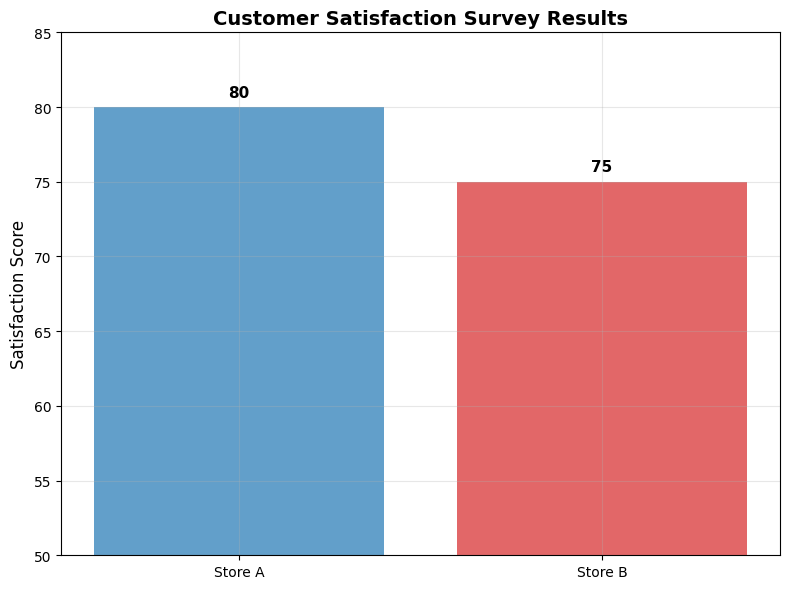

📊 Typical executive presentation: Store A appears to outperform Store B.
💭 Initial reaction: 'Store B clearly needs intervention'
⚠️  But wait... this chart only shows averages. What's the full story?


In [233]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
teams = ['Store A', 'Store B']
satisfaction_means = [80, 75]
bars = ax.bar(teams, satisfaction_means, color = colors, alpha=0.7)
ax.set_ylim(50, 85)  
ax.set_ylabel('Satisfaction Score', fontsize=12)
ax.set_title('Customer Satisfaction Survey Results', fontsize=14, fontweight='bold')
# Add value labels on bars
for bar, value in zip(bars, satisfaction_means):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{value}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Typical executive presentation: Store A appears to outperform Store B.")
print("💭 Initial reaction: 'Store B clearly needs intervention'")
print("⚠️  But wait... this chart only shows averages. What's the full story?")

# What the Bar Chart Hides - The Rest of the Story

The same 5-point mean difference can represent very different business realities. Let's examine three different scenarios that would all produce the **identical bar chart** like you see above.

## Same Bar Chart: Three Different Scenarios

In [234]:
# Generate three different scenarios with identical means but different statistical stories

# Scenario 1: Small sample, small variance
np.random.seed(123)
store_a_scenario_a = np.random.normal(80, 5, 50)  
store_b_scenario_a = np.random.normal(75, 5, 50)  
scenario_a = pd.DataFrame({
    'store': ['Store A'] * 50 + ['Store B'] * 50,
    'satisfaction': np.concatenate([store_a_scenario_a, store_b_scenario_a])
})

# Scenario 2: Small sample, large variance (noisy signal) 
np.random.seed(48)
store_a_scenario_b = np.random.normal(80, 20, 50)  
store_b_scenario_b = np.random.normal(75, 20, 50)  
scenario_b = pd.DataFrame({
    'store': ['Store A'] * 50 + ['Store B'] * 50,
    'satisfaction': np.concatenate([store_a_scenario_b, store_b_scenario_b])
})

# Scenario 3: Large sample, same large variance as B (more power)
np.random.seed(20)
store_a_scenario_c = np.random.normal(80, 20, 500)  
store_b_scenario_c = np.random.normal(75, 20, 500)  
scenario_c = pd.DataFrame({
    'store': ['Store A'] * 500 + ['Store B'] * 500,
    'satisfaction': np.concatenate([store_a_scenario_c, store_b_scenario_c])
})

print("📋 Generated three scenarios:")
mean_a_a = scenario_a[scenario_a['store'] == 'Store A']['satisfaction'].mean()
mean_b_a = scenario_a[scenario_a['store'] == 'Store B']['satisfaction'].mean()
mean_a_b = scenario_b[scenario_b['store'] == 'Store A']['satisfaction'].mean()
mean_b_b = scenario_b[scenario_b['store'] == 'Store B']['satisfaction'].mean()
mean_a_c = scenario_c[scenario_c['store'] == 'Store A']['satisfaction'].mean()
mean_b_c = scenario_c[scenario_c['store'] == 'Store B']['satisfaction'].mean()
print(f"Scenario 1: {len(scenario_a)//2} sample per store, low variance")
print(f"  Store A mean: {mean_a_a:.0f}")
print(f"  Store B mean: {mean_b_a:.0f}")
print(f"Scenario 2: {len(scenario_b)//2} sample per store, high variance")
print(f"  Store A mean: {mean_a_b:.0f}")
print(f"  Store B mean: {mean_b_b:.0f}")
print(f"Scenario 3: {len(scenario_c)//2} sample per store, high variance")
print(f"  Store A mean: {mean_a_c:.0f}")
print(f"  Store B mean: {mean_b_c:.0f}")
print("\n✅ All scenarios have the same 5-point mean difference")
print("❓ But do they tell the same business story?")


📋 Generated three scenarios:
Scenario 1: 50 sample per store, low variance
  Store A mean: 80
  Store B mean: 75
Scenario 2: 50 sample per store, high variance
  Store A mean: 80
  Store B mean: 75
Scenario 3: 500 sample per store, high variance
  Store A mean: 80
  Store B mean: 75

✅ All scenarios have the same 5-point mean difference
❓ But do they tell the same business story?


## How to Reveal the Full Story? 

## Scenario 1: Small Variance, Small Sample

In Scenario 1, both stores have relatively small sample sizes as well as low variance in customer satisfaction scores. This means:
- Data points are tightly clustered around each store's mean
- The difference between stores is clearly visible and statistically significant
- We can be confident that Store A truly outperforms Store B

**Key insight**: Low variance makes even modest samples informative for decision-making.

Next, we'll examine Scenario 2, where the same sample sizes are paired with much higher variance, making any meaningful difference nearly impossible to detect despite identical means.

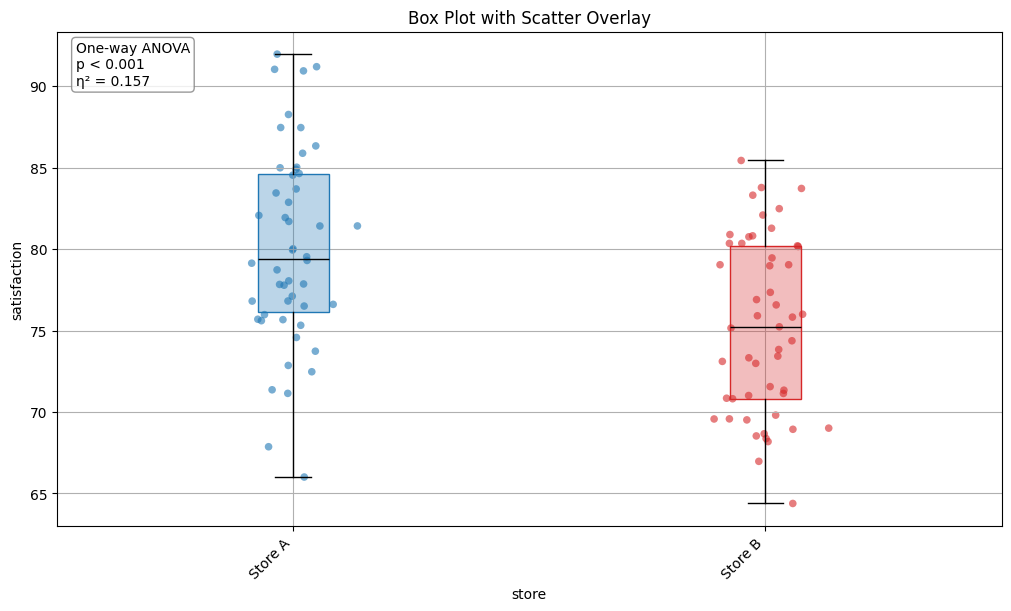

In [235]:
fig, ax = plot_box_scatter(scenario_a, x='store', y= 'satisfaction', show_stat_test=True, palette = colors, jitter=0.05)

## Scenario 2: High Variance, Small Sample

In Scenario 2, both stores maintain the same small sample sizes but now exhibit high variance in customer satisfaction scores. This creates a dramatically different situation:
- Data points are widely scattered around each store's mean
- The difference between stores becomes difficult to distinguish from random noise
- Statistical analysis shows that any apparent difference is NOT statistically significant
- Despite identical means to Scenario 1, we cannot confidently conclude that Store A outperforms Store B

**Key insight**: High variance makes small samples unreliable for decision-making, even when means appear different.

This scenario demonstrates how the same mean difference can tell completely different stories depending on data variability. The executive summary bar chart would look identical to Scenario 1, but the underlying reality is fundamentally different - we simply don't have enough evidence to support business action.


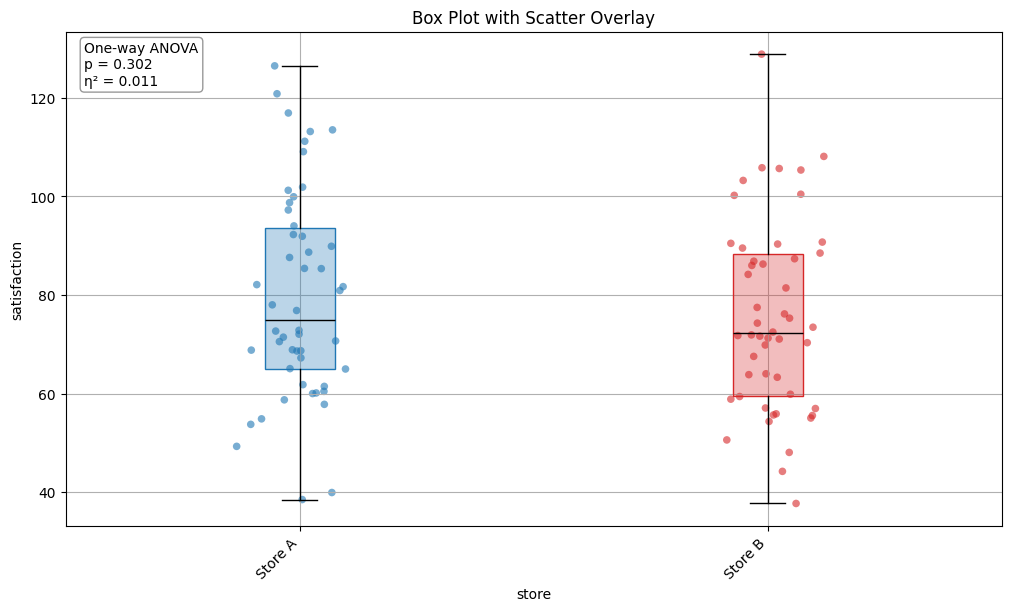

In [236]:
fig, ax = plot_box_scatter(scenario_b, x='store', y= 'satisfaction', show_stat_test=True, palette = colors, jitter=0.05)

## Same Numbers, Opposite Conclusions

So you can see from the plots above that the statistical tests are not significant for Scenario 2, but significant for Scenario 1.

Let's put the two box_scatter plots and the bar chart side by side. You can see that:

- **The bar chart (right panel) tells an identical story** - both scenarios show the exact same 5-point difference between Store A and Store B
- **The box plots reveal completely different realities** - Scenario 1 shows tight, confident data while Scenario 2 shows noisy, uncertain data  
- **Statistical significance differs dramatically** - the same mean difference is actionable in Scenario 1 but not in Scenario 2
- **Business implications are opposite** - one scenario justifies intervention, the other suggests collecting more data first

**The critical takeaway**: Visuals showing only averages can be misleading. The same bar chart can represent either a clear business signal requiring action or statistical noise requiring caution. Without understanding the underlying data distribution and statistical confidence, business leaders may make costly decisions based on phantom patterns.

This is why looking beyond simple averages is essential for data-driven decision making.

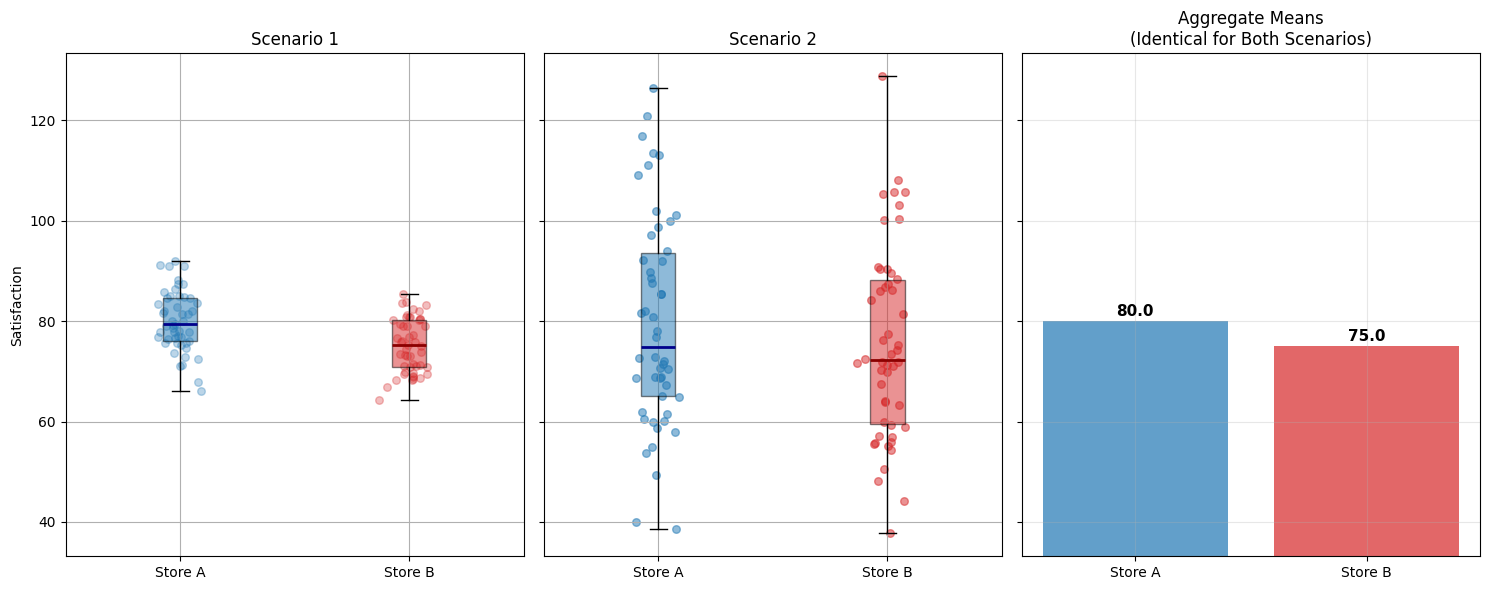

In [240]:
# Create side-by-side subplots with shared y-axis (3 subplots)
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

# Create box plots manually for each scenario with specific parameters
scenarios = [
    (scenario_a, 'Scenario 1', axes[0], {'jitter': 0.05, 'alpha': 0.3, 'point_size': 30}),
    (scenario_b, 'Scenario 2', axes[1], {'jitter': 0.05, 'alpha': 0.5, 'point_size': 30})
]

# First, determine the overall y-axis range from both datasets
all_values = np.concatenate([
    scenario_a['satisfaction'].values, 
    scenario_b['satisfaction'].values
])
y_min, y_max = all_values.min(), all_values.max()
y_range = y_max - y_min
y_padding = y_range * 0.05  # 5% padding
y_limits = (y_min - y_padding, y_max + y_padding)

for data, title, ax, params in scenarios:
    # Get data for each store
    store_data = [data[data['store'] == store]['satisfaction'].values 
                  for store in ['Store A', 'Store B']]
    
    # Create box plot
    bp = ax.boxplot(store_data, patch_artist=True, labels=['Store A', 'Store B'])
    
    # Color the boxes
    bp['boxes'][0].set_facecolor(colors[0])
    bp['boxes'][0].set_alpha(0.5)
    bp['boxes'][1].set_facecolor(colors[1])
    bp['boxes'][1].set_alpha(0.5)
    # Change median line colors
    bp['medians'][0].set_color('darkblue')  # Store A median
    bp['medians'][0].set_linewidth(2)
    bp['medians'][1].set_color('darkred')   # Store B median  
    bp['medians'][1].set_linewidth(2)
    
    # Add scatter points with jitter using scenario-specific parameters
    np.random.seed(42)  # For consistent jitter
    for i, store_vals in enumerate(store_data):
        x_jitter = np.random.normal(i + 1, params['jitter'], len(store_vals))
        ax.scatter(x_jitter, store_vals, alpha=params['alpha'], 
                  s=params['point_size'], color=colors[i])
    
    # Formatting
    ax.set_title(title)
    ax.set_ylabel('Satisfaction' if ax == axes[0] else '')  # Only label left y-axis
    ax.grid(True)
    ax.set_ylim(y_limits)  # Set same y-limits for both plots

# Add the aggregate mean bar chart in the third subplot (far right)
teams = ['Store A', 'Store B']
# Calculate means (should be identical across both scenarios)
satisfaction_means = [
    scenario_a[scenario_a['store'] == 'Store A']['satisfaction'].mean().round(),
    scenario_b[scenario_b['store'] == 'Store B']['satisfaction'].mean().round()
]

bars = axes[2].bar(teams, satisfaction_means, color=colors, alpha=0.7)
axes[2].set_ylim(y_limits)  # Same y-limits as box plots
axes[2].set_title('Aggregate Means\n(Identical for Both Scenarios)')
axes[2].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, satisfaction_means):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{value:.1f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## What To Do with Noisy Data

How do you make data-driven decisions then, when your data is noisy (i.e., has high variance)? Scenario 3 provides the answer.

In Scenario 3, we maintain the same high variance as Scenario 2 but dramatically increase the sample size. This demonstrates the power of larger datasets:
- Data points remain widely scattered (same high variance as Scenario 2)
- However, the larger sample size provides much more statistical power
- With more data points, we can now distinguish the signal from the noise
- Statistical analysis shows the difference IS statistically significant despite the high variance
- The larger sample gives us confidence that Store A truly outperforms Store B

**Key insight**: When variance is high, larger sample sizes can restore our ability to make confident business decisions.

**But here's an important nuance:** Comparing Scenarios 1 and 3, would you say that since both show 5-point differences that are statistically significant, the two scenarios are essentially the same? 

The answer is a big NO. In Scenario 1, the 5-point difference represents 100% of the standard deviation—a very strong effect. In Scenario 3, the same 5-point difference is only 25% of the standard deviation—a small effect. **Business implication**: Scenario 1 suggests a major operational difference worth immediate replication, while Scenario 3 indicates a modest advantage that may not justify large-scale changes.

**Business takeaway**: 
- **Don't assume all "statistically significant" results deserve the same response**—the size of the effect matters for resource allocation (I will explain *effect size* more in a future article)
- If your initial analysis is inconclusive due to noisy data, don't abandon the question— consider collecting more data to enhance the statistical power.
- **Important caveat**: Larger sample sizes don't guarantee statistical significance—they simply give us more confidence that we'll detect a real difference when one actually exists. (I will explain *statistical power* in a future article.)

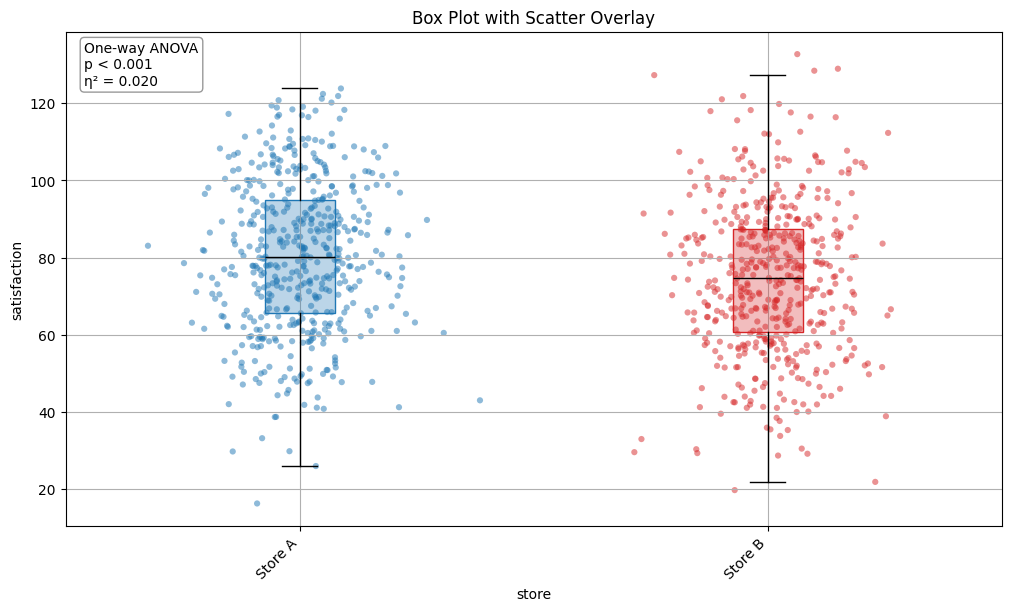

In [238]:
fig, ax = plot_box_scatter(scenario_c, x='store', y='satisfaction', show_stat_test=True, palette=colors, point_size=20, point_alpha=0.5)

## Put It All Together

**Key takeaways and actionable steps for business decision makers:**

**🚫 What NOT to do:**
- Don't make decisions based solely on mean differences
- Don't assume identical means represent identical business situations

**✅ What TO do:**
1. **Always request distribution information** alongside means (e.g., box plots, scatter plots, or variance metrics)
2. **Ask for statistical significance testing** before concluding that observed differences are actionable
3. **Ask for effect size** to understand whether statistically significant differences justify the cost of action

**🎁 Bonus point:** When results are inconclusive due to high variance, consider collecting larger samples to increase statistical power and bring clarity.

**🎯 Bottom line:** The same 5-point mean difference can justify immediate action (Scenario 1), require more data collection (Scenario 2), or confirm action with high confidence but modest impact (Scenario 3). Understanding data variability, statistical significance, and effect size prevents costly misinterpretations of your business metrics.

**🔮 What's next:** I'll write more bite-sized articles illustrating key statistical concepts for business decision-making. **Effect size** and **statistical power** are on the list. Let me know what else you'd like to learn about.

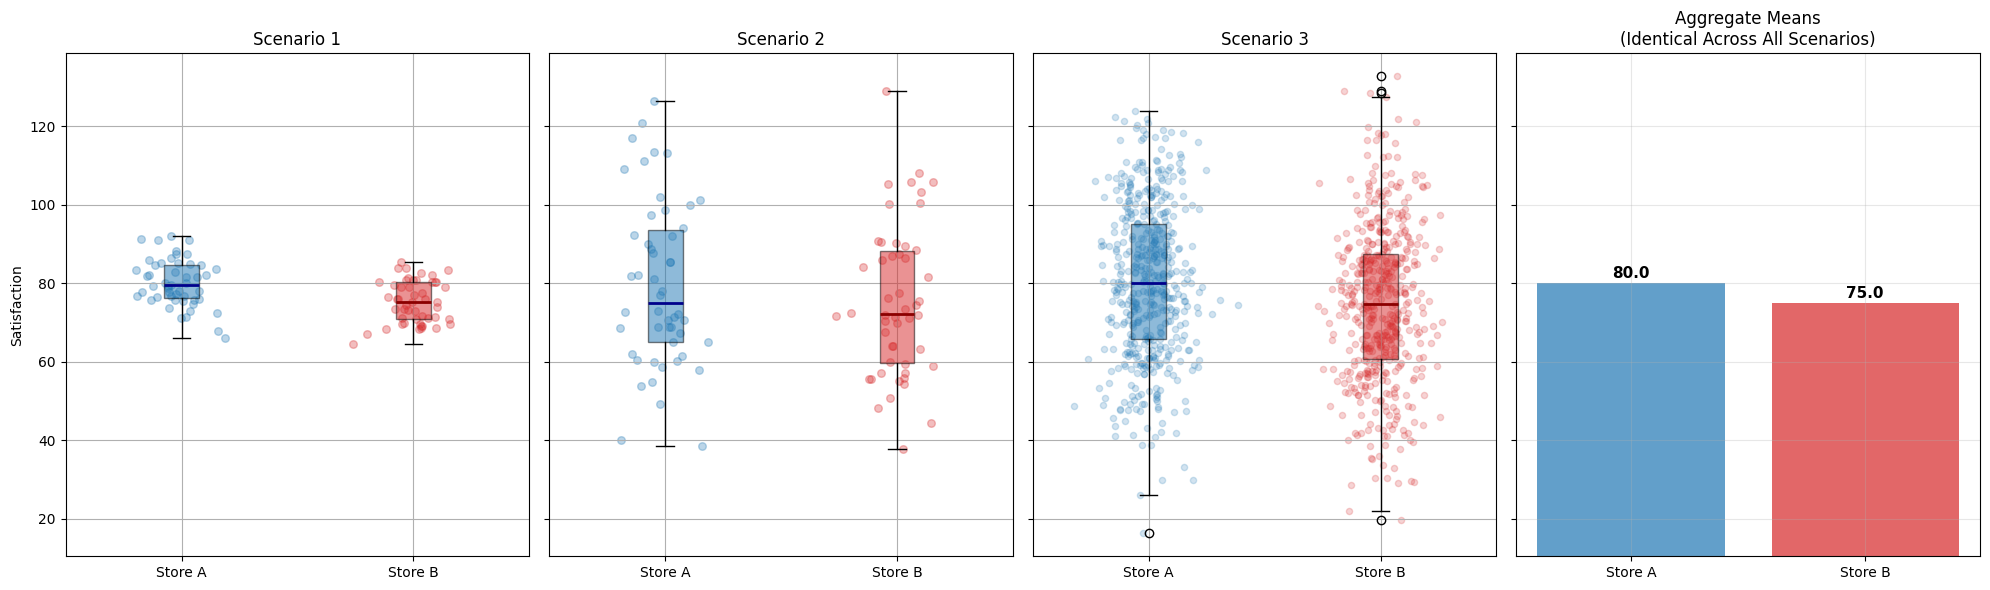

In [239]:
# Create side-by-side subplots with shared y-axis (now 4 subplots)
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Create box plots manually for each scenario with specific parameters
scenarios = [
    (scenario_a, 'Scenario 1', axes[0], {'jitter': 0.1, 'alpha': 0.3, 'point_size': 30}),
    (scenario_b, 'Scenario 2', axes[1], {'jitter': 0.1, 'alpha': 0.3, 'point_size': 30}),
    (scenario_c, 'Scenario 3', axes[2], {'jitter': 0.1, 'alpha': 0.2, 'point_size': 20})
]

# First, determine the overall y-axis range from all three datasets
all_values = np.concatenate([
    scenario_a['satisfaction'].values, 
    scenario_b['satisfaction'].values,
    scenario_c['satisfaction'].values
])
y_min, y_max = all_values.min(), all_values.max()
y_range = y_max - y_min
y_padding = y_range * 0.05  # 5% padding
y_limits = (y_min - y_padding, y_max + y_padding)

for data, title, ax, params in scenarios:
    # Get data for each store
    store_data = [data[data['store'] == store]['satisfaction'].values 
                  for store in ['Store A', 'Store B']]
    
    # Create box plot
    bp = ax.boxplot(store_data, patch_artist=True, labels=['Store A', 'Store B'])
    
    # Color the boxes
    bp['boxes'][0].set_facecolor(colors[0])
    bp['boxes'][0].set_alpha(0.5)
    bp['boxes'][1].set_facecolor(colors[1])
    bp['boxes'][1].set_alpha(0.5)
    # Change median line colors
    bp['medians'][0].set_color('darkblue')  # Store A median
    bp['medians'][0].set_linewidth(2)
    bp['medians'][1].set_color('darkred')   # Store B median  
    bp['medians'][1].set_linewidth(2)
    
    # Add scatter points with jitter using scenario-specific parameters
    np.random.seed(42)  # For consistent jitter
    for i, store_vals in enumerate(store_data):
        x_jitter = np.random.normal(i + 1, params['jitter'], len(store_vals))
        ax.scatter(x_jitter, store_vals, alpha=params['alpha'], 
                  s=params['point_size'], color=colors[i])
    
    # Formatting
    ax.set_title(title)
    ax.set_ylabel('Satisfaction' if ax == axes[0] else '')  # Only label left y-axis
    ax.grid(True)
    ax.set_ylim(y_limits)  # Set same y-limits for all plots

# Add the aggregate mean bar chart in the fourth subplot (far right)
teams = ['Store A', 'Store B']
# Calculate means (should be identical across all scenarios)
satisfaction_means = [
    scenario_a[scenario_a['store'] == 'Store A']['satisfaction'].mean().round(),
    scenario_b[scenario_b['store'] == 'Store B']['satisfaction'].mean().round()
]

bars = axes[3].bar(teams, satisfaction_means, color=colors, alpha=0.7)
axes[3].set_ylim(y_limits)  # Same y-limits as box plots
axes[3].set_title('Aggregate Means\n(Identical Across All Scenarios)')
axes[3].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, satisfaction_means):
    height = bar.get_height()
    axes[3].text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{value:.1f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()